###  How to find the best rated Movies in Netflix
Best Movies

Shamsul Abedin · 4 Submissions

### Task Details
The mission of this task to the best rated movies in netfilx.

### Expected Submission
What should users submit? Should they solve the task primarily using Notebooks or Datasets? What should the solution contain?

### Evaluation
What makes a good solution? How do you evaluate which submission is better than another?

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import norm
%matplotlib inline                      #plot inline
%config Completer.use_jedi = False      #active autocomplete in jupyter

UsageError: unrecognized arguments: #plot inline


In [29]:
%config IPCompleter.greedy=True
netflix_data=pd.read_csv('netflix_titles.csv')
netflix_data=netflix_data[netflix_data['type']=='Movie']
netflix_data.head(2)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [38]:
#want to know maximum of listed in items to split columns
data=netflix_data['listed_in'].str.count(',')
max(data)
#there are max(data)+1 total items
netflix_data[['1st_listed','2nd_listed','3rd_listed']]=netflix_data['listed_in'].str.split(",",expand=True)
df_test=netflix_data.copy()
col_list=['1st_listed','2nd_listed','3rd_listed']
num_columns=len(col_list)
new_df=df_test.drop(col_list,axis=1)
new_df['listed']=""
for t in range(0,len(netflix_data)):
                       for k in range(1,len(col_list)+1):
                            new_row=netflix_data.iloc[t:t+1,:len(netflix_data.columns)-k+1:len(netflix_data.columns)-k]
                            new_row_info=new_df.iloc[t:t+1,:].values.tolist()[0]
                            new_item=new_row.values.tolist()[0]
                            new_row_info.append(new_item[-1])
                            del(new_row_info[-2])
                            row_fixed={new_df.columns.values[i]:new_row_info[i] for i in range(0,len(new_row_info))}
                            new_df=new_df.append(row_fixed,ignore_index=True)
                            

#### Inspect the information at a high level

In [36]:
new_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


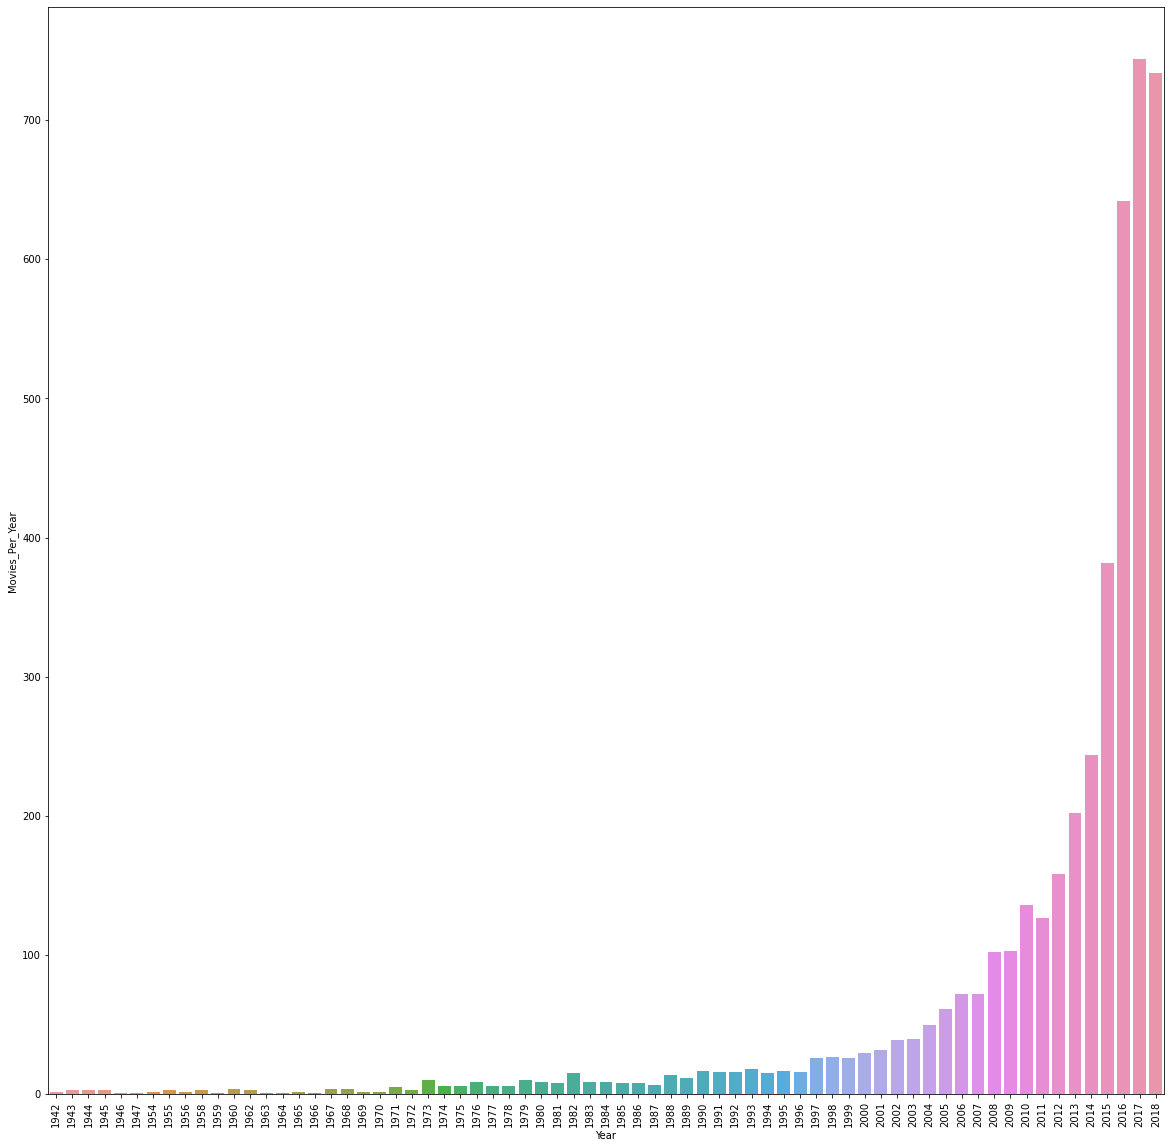

In [35]:
#netflix_data[['1st_listed','2nd_listed','3rd_listed']]=netflix_data['listed_in'].str.split(",",expand=True)
movies_per_year=netflix_data['release_year'].value_counts().reset_index()
movies_per_year.columns.values[0]='Year'
movies_per_year.columns.values[1]='Count'
plt.figure(figsize=[20,20])
movies_per_year2=movies_per_year[movies_per_year['Year']<2019].copy()
movies_per_year2.sort_values(by='Year',inplace=True)
sns.barplot(data=movies_per_year2,x='Year',y='Count')
plt.xlabel('Year')
plt.ylabel('Movies_Per_Year')
plt.xticks(rotation=90)
plt.show()

In [39]:
import numpy as np
new_df_nonull=new_df[(new_df['listed'] !="")& (new_df['type']=='Movie')]                  
moviestype_by_year=new_df_nonull[['listed','release_year']]
moviestype_by_year['Counts'] = np.zeros(len(moviestype_by_year))
moviestype_by_year['listed']=moviestype_by_year['listed'].str.strip()
moviestype_by_year2=moviestype_by_year.groupby(['listed','release_year']).count().reset_index()


c:\users\hrcsl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\hrcsl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(array([1930., 1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010.,
        2020., 2030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

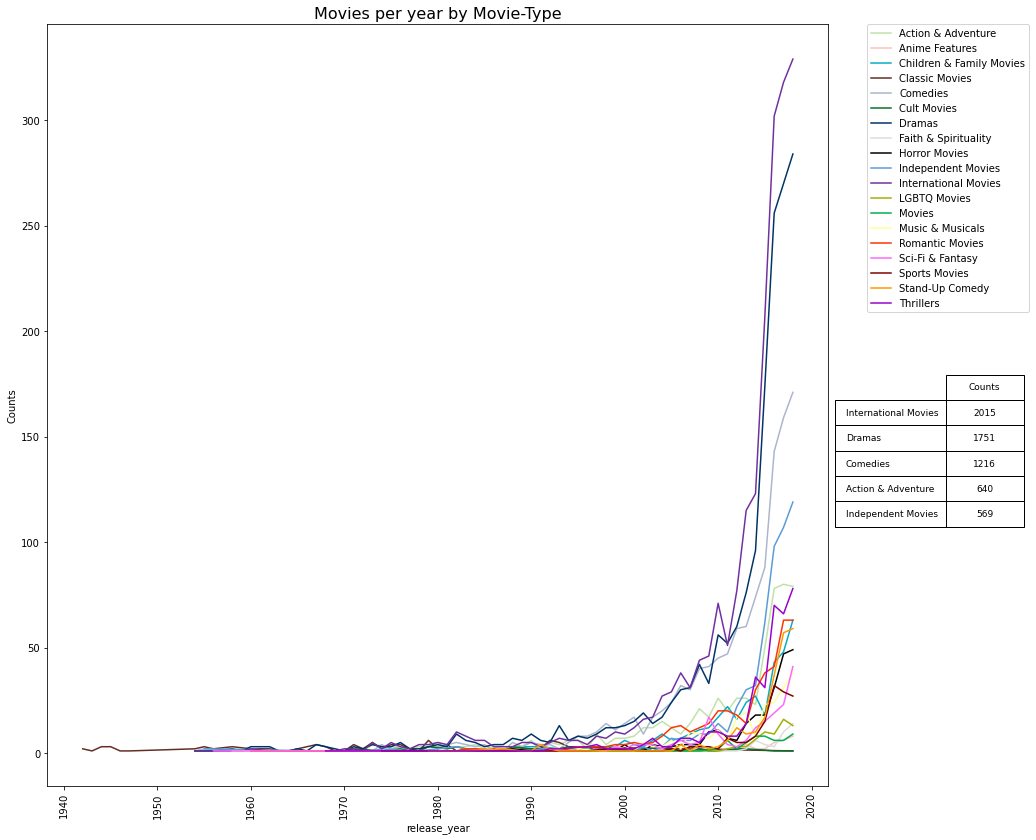

In [42]:
hex_colors=['#C1E1A7','#F9C1BD','#06ABC6','#622D24','#ABB5CD','#057129','#003366','#DDDDDD','#000000','#5B9BD5','#7030A0','#A2AE02','#00B050','#FFFF99','#FF3300','#FF66FF','#800000','#FF9900','#9900CC','#66FFFF','#FFFF00','#00FF00','#3366CC','#FFCCFF','#CC0066','#5F5F5F','#66FFCC','#B2B2B2','#0D8571','#FF5D5D','#B8ADF9','#F4DB9E','#D88C26','#0000CC','#D490FA',]
moviestype_by_year3=moviestype_by_year2[~moviestype_by_year2['listed'].isnull()]
moviestype_by_year3=moviestype_by_year3[(moviestype_by_year3['release_year']<=2018)]
plt.figure(figsize=[14,14])

summary=moviestype_by_year3[~moviestype_by_year3['listed'].str.contains("TV|Docu")].groupby('listed')['Counts'].sum().reset_index().sort_values('Counts',ascending=False).head()
summary.set_index('listed',inplace=True)

sns.lineplot(x='release_year',y='Counts',hue='listed',
             data=moviestype_by_year3[~moviestype_by_year3['listed'].str.contains("TV|Docu")],
                                      palette=sns.set_palette(sns.color_palette(hex_colors[0:21]))
            ,dashes=False)
plt.table(cellText=summary.values,colWidths = [0.05]*len(summary.columns),
          rowLabels=summary.index,
          colLabels=summary.columns,
          cellLoc = 'center', rowLoc = 'left',
          loc='upper center',
          bbox=[1.15 ,0.34, 0.1, 0.2])
plt.grid(False)          
plt.title('Movies per year by Movie-Type',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)




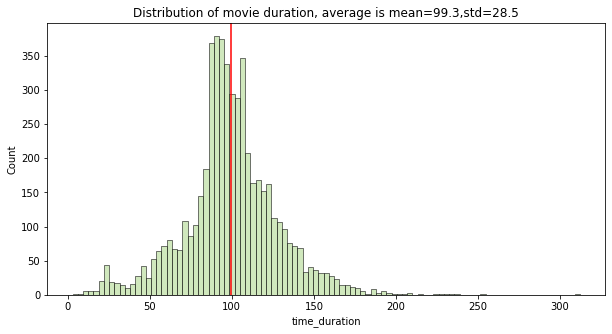

In [25]:
netflix_data[['time_duration','mins']]=netflix_data['duration'].str.split(" ",expand=True)
netflix_data.drop(columns='mins',inplace=True)
netflix_data = netflix_data.astype({"time_duration": int})
plt.figure(figsize=[10,5])
mean,std=norm.fit(netflix_data['time_duration'].dropna())
sns.histplot(x='time_duration',data=netflix_data)
plt.axvline(x=mean, color='r', linestyle='-')
plt.title('Distribution of movie duration, average is'+ ' ' + 'mean=%.1f,std=%.1f' %(mean,std))
plt.grid(False)

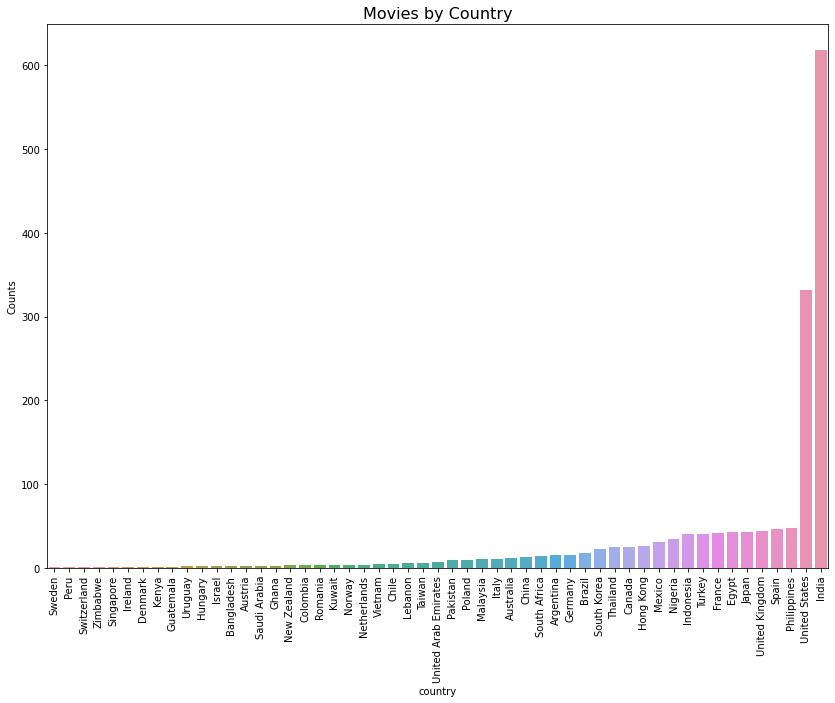

In [24]:
country2=netflix_data.dropna()
country2=country2[~country2['country'].str.contains(",")]
x=country2['country'].value_counts().reset_index()
titles=['country','Counts']
x.columns.values[1]=titles[1]
x.columns.values[0]=titles[0]
plt.figure(figsize=[14,10])
sns.barplot(x='country',y='Counts',data=x.sort_values(by='Counts',ascending=True),orientation="vertical")
plt.xticks(rotation=90)
plt.title('Movies by Country',fontsize=16)
plt.grid(False)
plt.show()

c:\users\hrcsl\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:title={'center':'Movies collaboration per country'}, xlabel='coll_0', ylabel='size'>

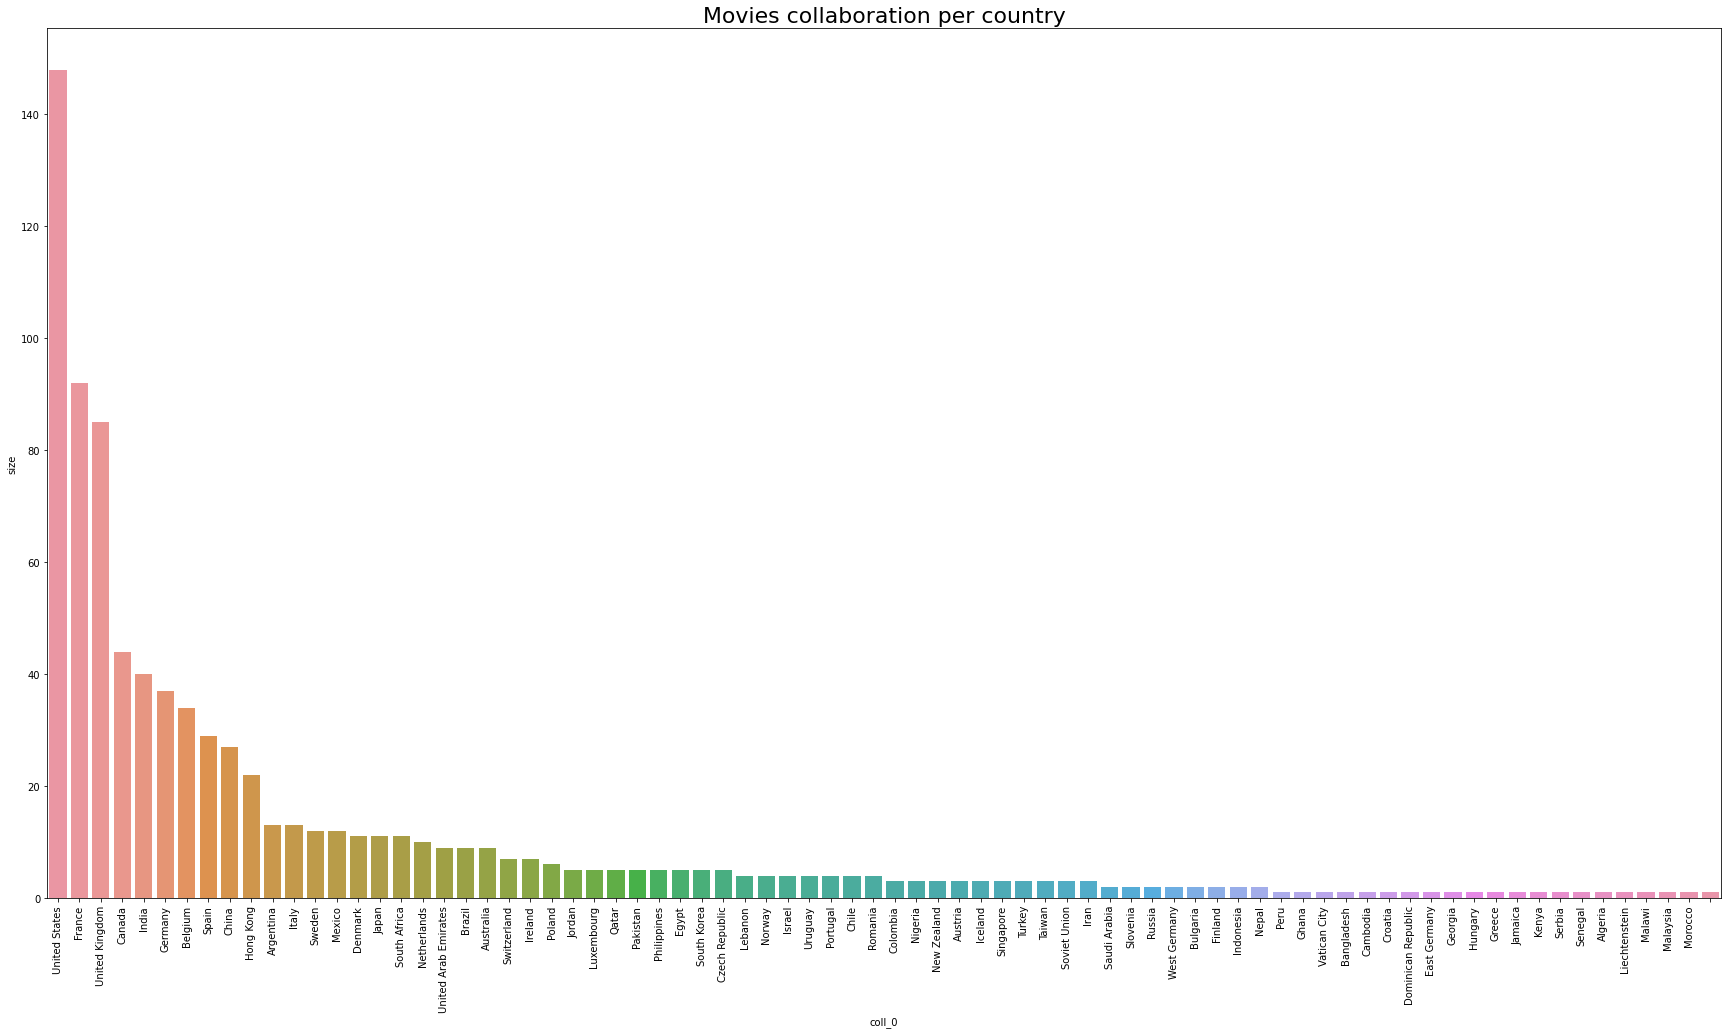

In [22]:
collab=netflix_data.dropna()
collab=collab[collab['type']=='Movie']
collaborations=collab[collab['country'].str.contains(",")]
colnames=['coll_'+str(i) for i in range(0,7)]
collaborations[colnames]=collaborations['country'].str.split(",",expand=True)
x2=collaborations.groupby(colnames[0], as_index=False)[colnames[0]].size()
for i in range(1,len(colnames)):
    to_append=collaborations.groupby(colnames[i], as_index=False)[colnames[i]].size()
    to_append.columns.values[0]='coll_0'
    x2=x2.append(to_append)

plt.figure(figsize=[30,16])
x2['coll_0']=x2['coll_0'].str.strip()
x3=x2.groupby('coll_0', as_index=False)['size'].sum().sort_values('size',ascending=False)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title('Movies collaboration per country',fontsize=22)
sns.barplot(x='coll_0',y='size',data=x3)

c:\users\hrcsl\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_continuous_distns.py:354: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
c:\users\hrcsl\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\hrcsl\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_continuous_distns.py:359: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


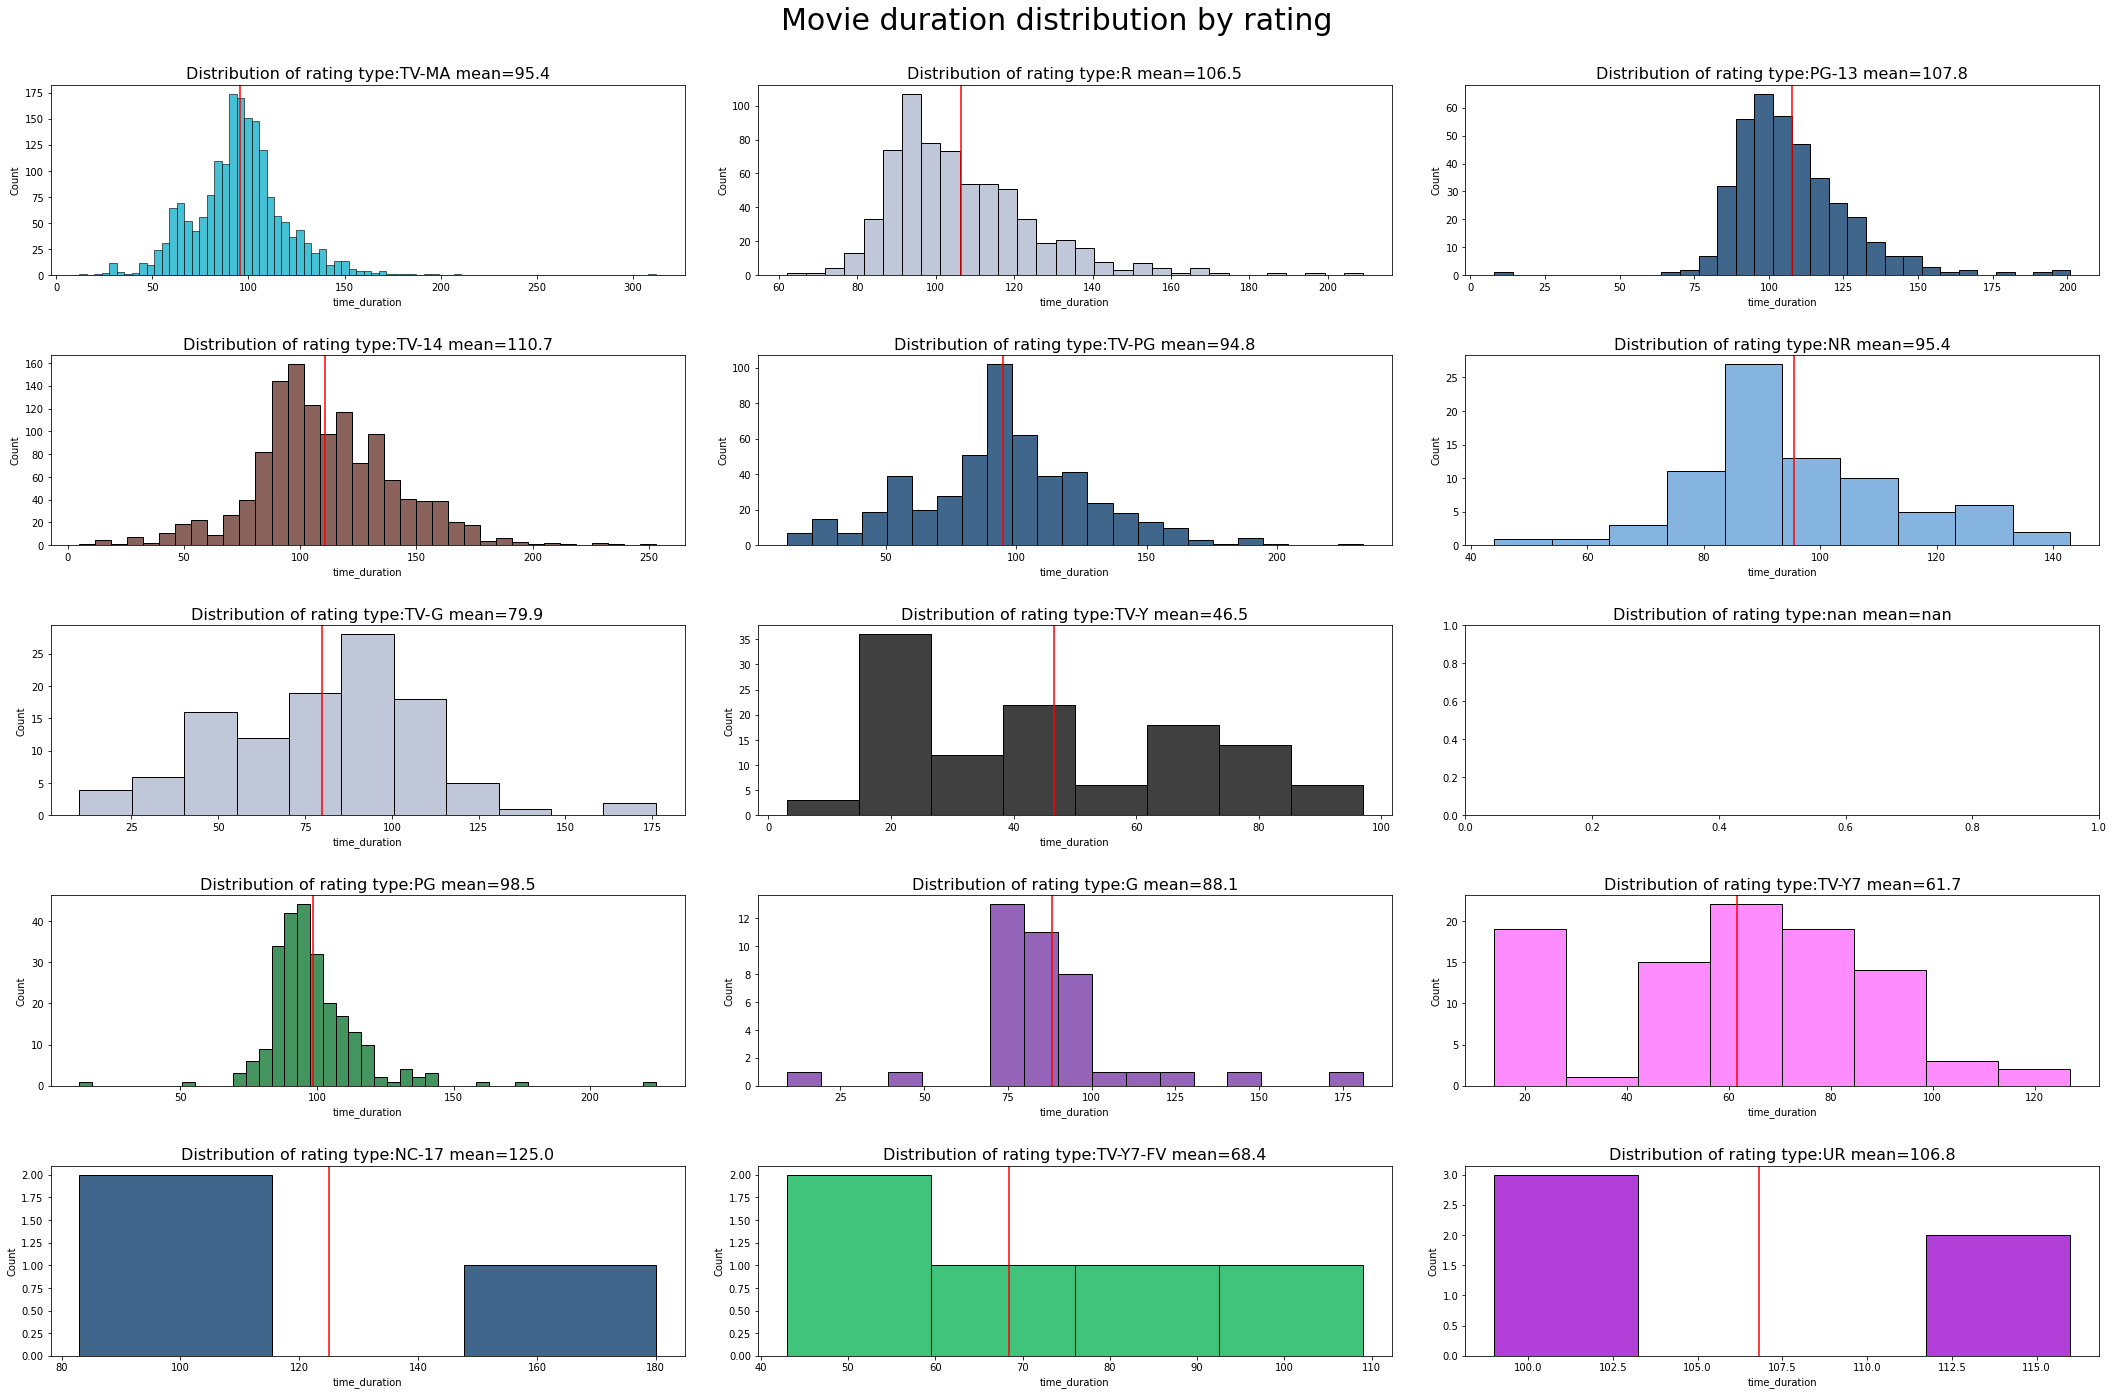

In [26]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharey=False)
fig.suptitle('Movie duration distribution by rating', fontsize=30)
total_it=0
for i in range(0,5):
    for k in range(0,3):
        mean,std=norm.fit(netflix_data['time_duration'][netflix_data['rating']==netflix_data['rating'].unique()[total_it]].dropna())
        sns.histplot(ax=axes[i][k],x='time_duration',
                     data=netflix_data[netflix_data['rating']==netflix_data['rating'].unique()[total_it]],
                     color=hex_colors[(i+2)*(k+1)])
        axes[i][k].axvline(x=mean, color='r', linestyle='-')
        axes[i][k].set_title('Distribution of rating type:'+str(netflix_data['rating'].unique()[total_it])+' '+ 'mean=%.1f' %(mean),fontsize=16)
        total_it+=1
    fig.tight_layout(pad=3.0)

In [61]:
hex_colors[:5]

['#C1E1A7', '#F9C1BD', '#06ABC6', '#622D24', '#ABB5CD']